**Objectives:**
1. Check for missing values
2. How many Alice rejections total?
3. look at percentages of total applications compared to alice rejections in the class.
4. for 706 and 705: look at dataset for rows without class or art unit (fill in value based on available value)
5. create and export a csv file with only the 705 and 706 rejections

In [26]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'


# Load data/art_unit_alice/rejection_types_with_alice_2015_to_2017-07-11.csv

In [27]:
df=pd.read_csv('data/art_unit_alice/rejection_types_with_alice_2015_to_2017-07-11.csv', index_col=None)
print(df.columns)
print(df.info())
print(df.describe())
df.head().T

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'app_id_x', 'ifw_number', 'document_cd', 'mail_dt',
       'art_unit', 'uspc_class', 'uspc_subclass', 'app_id_y', 'alice_in'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778669 entries, 0 to 1778668
Data columns (total 10 columns):
Unnamed: 0       int64
app_id_x         int64
ifw_number       object
document_cd      object
mail_dt          object
art_unit         object
uspc_class       object
uspc_subclass    object
app_id_y         float64
alice_in         float64
dtypes: float64(2), int64(2), object(6)
memory usage: 135.7+ MB
None
         Unnamed: 0      app_id_x      app_id_y      alice_in
count  1.778669e+06  1.778669e+06  1.713149e+06  1.778669e+06
mean   1.989841e+06  1.408780e+07  1.408981e+07  2.581593e-02
std    1.191709e+06  5.774059e+05  5.832540e+05  1.585859e-01
min    0.000000e+00  1.200003e+07  1.200003e+07  0.000000e+00
25%    9.555980e+05  1.376726e+07  1.376612e+07  0.000000e+00
50%    1.991182e+06  1.413574e+07  1

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
app_id_x,14150981,14198961,13796589,14673475,14669113
ifw_number,100867762,100867788,100867794,100867844,100867850
document_cd,CTFR,CTFR,CTNF,CTNF,CTNF
mail_dt,2015-10-15,2015-10-15,2015-10-15,2015-10-15,2015-10-15
art_unit,2632,2699,3776,2627,2666
uspc_class,375,345,606,345,382
uspc_subclass,219000,173000,159000,175000,118000
app_id_y,NaN,NaN,NaN,NaN,NaN
alice_in,0,0,0,0,0


## remove Unnamed column

In [28]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
df.head()

,app_id_x,ifw_number,document_cd,mail_dt,art_unit,uspc_class,uspc_subclass,app_id_y,alice_in
0,14150981,100867762,CTFR,2015-10-15,2632,375,219000,NaN,0.0
1,14198961,100867788,CTFR,2015-10-15,2699,345,173000,NaN,0.0
2,13796589,100867794,CTNF,2015-10-15,3776,606,159000,NaN,0.0
3,14673475,100867844,CTNF,2015-10-15,2627,345,175000,NaN,0.0
4,14669113,100867850,CTNF,2015-10-15,2666,382,118000,NaN,0.0


# 1. Check for missing values

In [29]:
print(df['art_unit'].isna().sum())
print(df['uspc_class'].isna().sum())
print(df['uspc_subclass'].isna().sum())

0
0
0


In [30]:
print(df['art_unit'].isnull().sum())
print(df['uspc_class'].isnull().sum())
print(df['uspc_subclass'].isnull().sum())

0
0
0


In [32]:
count_nan = len(df) - df.count()
count_nan

app_id_x             0
ifw_number           0
document_cd          0
mail_dt              0
art_unit             0
uspc_class           0
uspc_subclass        0
app_id_y         65520
alice_in             0
dtype: int64

# 2. How many alice rejections total?
**45,918** alice rejections out of 1,778,669 applications with office actions.

In [5]:
df['alice_in'].value_counts()

0.0    1732751
1.0      45918
Name: alice_in, dtype: int64

# issue where I get different value counts (solved by converting values to strings)

In [34]:
df[df['art_unit']=='0']
#17139

,app_id_x,ifw_number,document_cd,mail_dt,art_unit,uspc_class,uspc_subclass,app_id_y,alice_in
80951,14091028,103154643,CTFR,2015-12-23,0,424,141100,14091028.0,0.0
80964,14517473,103154799,CTNF,2015-12-23,0,166,256000,14517473.0,0.0
80969,14033204,103154894,CTFR,2015-12-23,0,315,077000,14033204.0,0.0
80974,14034169,103156096,CTFR,2015-12-23,0,264,638000,14034169.0,0.0
80992,14000773,103156371,CTNF,2015-12-23,0,370,311000,14000773.0,0.0
80993,14099483,103156415,CTFR,2015-12-21,0,362,249040,14099483.0,0.0
81003,13734066,103156527,CTFR,2015-12-23,0,000,058000,13734066.0,0.0
81022,14048997,103156808,CTFR,2015-12-21,0,073,012010,14048997.0,0.0
81028,14047445,103156831,CTFR,2015-12-21,0,200,00500A,14047445.0,0.0
81031,14076998,103156841,CTFR,2015-12-23,0,709,231000,14076998.0,1.0


In [35]:
df[df['art_unit']==0]
#13423

,app_id_x,ifw_number,document_cd,mail_dt,art_unit,uspc_class,uspc_subclass,app_id_y,alice_in
1507378,13116344,IV9PRBGJRXEAPX0,CTNF,2016-11-10,0,707,737000,13116344.0,0.0
1507452,13082230,IV9QQOEIRXEAPX1,CTFR,2016-11-10,0,000,224000,13082230.0,0.0
1507921,13062592,IV9V4VOLRXEAPX5,CTFR,2016-11-10,0,000,218000,13062592.0,0.0
1507941,13162245,IV9V9C4CRXEAPX5,CTFR,2016-11-10,0,000,007290,13162245.0,1.0
1507964,13086602,IV9VEF9KRXEAPX0,CTFR,2016-11-10,0,341,020000,13086602.0,0.0
1508019,12021227,IV9WGHHGRXEAPX4,CTFR,2016-11-10,0,000,010000,12021227.0,1.0
1508033,13022182,IV9X8Q01RXEAPX4,CTFR,2016-11-10,0,000,194000,13022182.0,0.0
1508083,13037093,IV9XY3UDRXEAPX4,CTFR,2016-11-10,0,705,051000,13037093.0,1.0
1508158,13045035,IV9Z1IDERXEAPX0,CTFR,2016-11-10,0,000,481000,13045035.0,0.0
1508202,15239609,IV9ZMXE9RXEAPX0,CTNF,2016-11-09,0,348,014020,15239609.0,0.0


# 3. look at percentages of total applications compared to alice rejections in the class.
```
Percent of Alice rejections in USPC class 706: 2.3445902344590235
Percent of Alice rejections in USPC class 705: 35.66625497461232
```
Did not do pre-cleaning and filling in missing values where an art_unit is present but there is no uspc class

In [52]:
df[df['art_unit']=='2121'] #2173 rows
df[df['art_unit']==2121] #204 rows

,app_id_x,ifw_number,document_cd,mail_dt,art_unit,uspc_class,uspc_subclass,app_id_y,alice_in
1507899,14201952,IV9UYM8TRXEAPX2,CTNF,2016-11-10,2121,700,295000,14201952.0,0.0
1513909,13707921,IVIMVO3PRXEAPX4,CTFR,2016-11-16,2121,700,300000,13707921.0,0.0
1514127,14360242,IVJHHBH1RXEAPX1,CTNF,2016-11-17,2121,700,297000,14360242.0,0.0
1514987,13980476,IVJKH5GHRXEAPX2,CTFR,2016-11-17,2121,700,287000,13980476.0,0.0
1515115,13891560,IVJKX5KARXEAPX4,CTFR,2016-11-17,2121,700,083000,13891560.0,0.0
1518638,14088014,IVK2HK52RXEAPX3,CTNF,2016-11-17,2121,700,017000,14088014.0,0.0
1519349,14678720,IVKZTD5XRXEAPX5,CTFR,2016-11-16,2121,700,067000,14678720.0,0.0
1519467,14556212,IVL0962WRXEAPX3,CTNF,2016-11-18,2121,700,295000,14556212.0,0.0
1519698,14360109,IVL191JHRXEAPX0,CTNF,2016-11-18,2121,700,175000,14360109.0,0.0
1520367,13946857,IVL46MR0RXEAPX0,CTFR,2016-11-18,2121,700,118000,13946857.0,0.0


In [56]:
print(len(df[df['uspc_class']=='706'])) #4649 rows
#df[df['uspc_class']==706] #0 rows
print(len(df[df['uspc_class']=='705']))

4649
72870


In [61]:
(len(df[(df['uspc_class']=='706')&(df['alice_in']==1)])/(len(df[df['uspc_class']=='706'])))*100

2.3445902344590235

In [67]:
print('Percent of Alice rejections in USPC class 706: {0}'.format((len(df[(df['uspc_class']=='706')&(df['alice_in']==1)])/(len(df[df['uspc_class']=='706'])))*100))
print('Percent of Alice rejections in USPC class 705: {0}'.format((len(df[(df['uspc_class']=='705')&(df['alice_in']==1)])/(len(df[df['uspc_class']=='705'])))*100))

Percent of Alice rejections in USPC class 706: 2.3445902344590235
Percent of Alice rejections in USPC class 705: 35.66625497461232


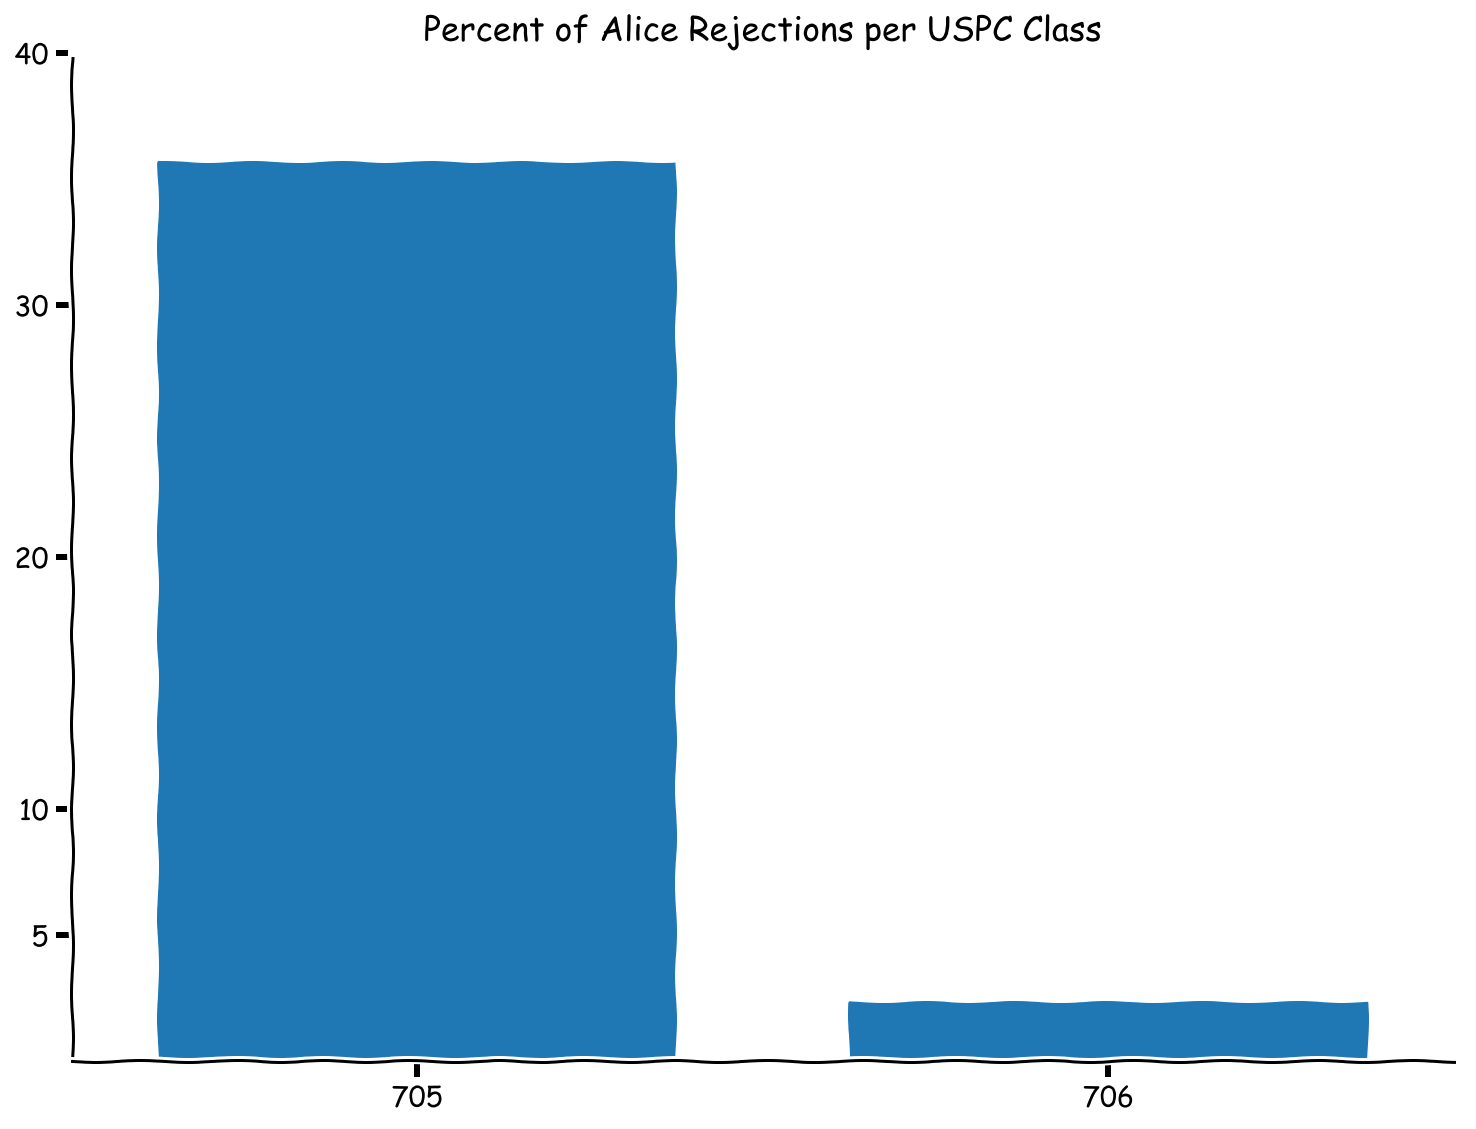

In [100]:
percent_of_706 = (len(df[(df['uspc_class']=='706')&(df['alice_in']==1)])/(len(df[df['uspc_class']=='706'])))*100
percent_of_705 = (len(df[(df['uspc_class']=='705')&(df['alice_in']==1)])/(len(df[df['uspc_class']=='705'])))*100
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [percent_of_705, percent_of_706], 0.75)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 40])
    ax.set_xticklabels(['705', '706'])
    plt.yticks([5,10,20,30,40])

    plt.title("Percent of Alice Rejections per USPC Class")

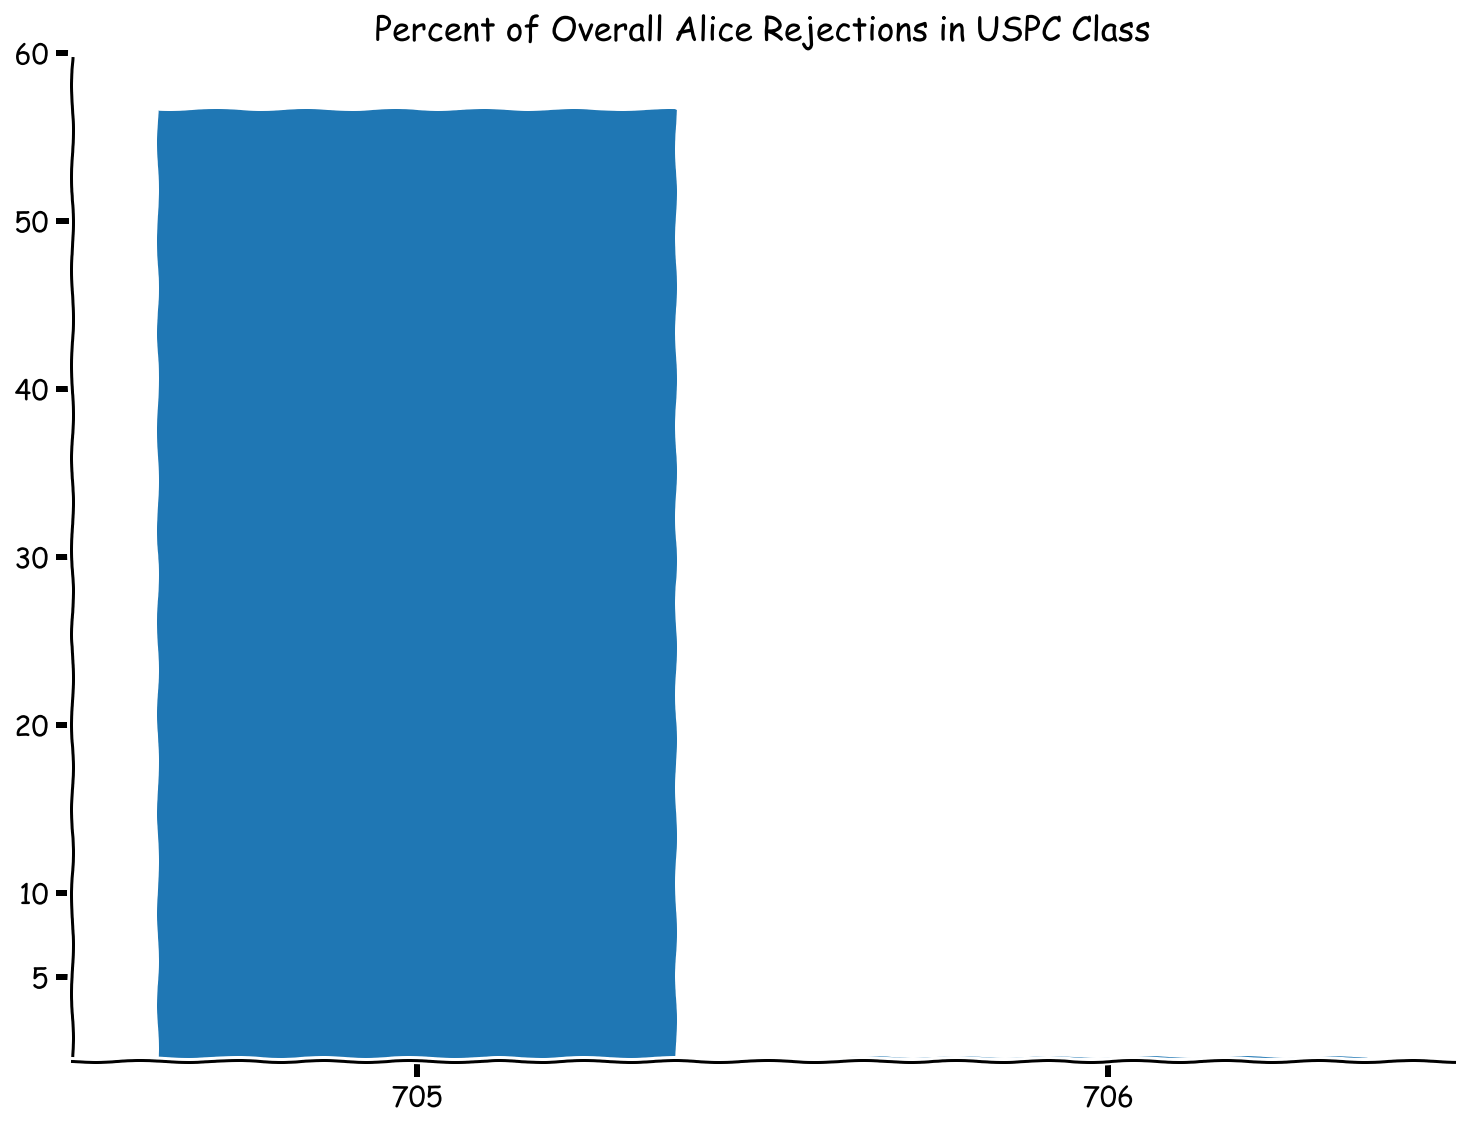

In [106]:
percent_of_706_overall_alice = (len(df[(df['uspc_class']=='706')&(df['alice_in']==1)])/45918)*100
percent_of_705_overall_alice = (len(df[(df['uspc_class']=='705')&(df['alice_in']==1)])/45918)*100
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [percent_of_705_overall_alice, percent_of_706_overall_alice], 0.75)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 60])
    ax.set_xticklabels(['705', '706'])
    plt.yticks([5,10,20,30,40,50,60])

    plt.title("Percent of Overall Alice Rejections in USPC Class")

# 4. for 706 and 705: look at dataset for rows with art unit but no uspc class and fill in 705 or 706. My focus is on the uspc class not the art unit. 

In [75]:
print(len(df[df['uspc_class']=='0']))
print(len(df[df['uspc_class']==0]))
print(len(df[df['uspc_class'].isnull()]))
print(len(df[df['uspc_class'].isna()]))

0
0
0
0


In [108]:
len(df)

1778669

In [113]:
print(len(df[df['uspc_class']=='706']))
print(len(df[(df['uspc_class']=='706')&(df['alice_in']==1)]))

4649
109


In [114]:
print(len(df[df['uspc_class']=='705']))
print(len(df[(df['uspc_class']=='705')&(df['alice_in']==1)]))

72870
25990


### Change all USPC classes to strings.
some are intergers

In [129]:
#df[df['art_unit']==2121]
list_706_unique_art_unit = df[df['uspc_class']=='706']['art_unit'].unique().tolist()

In [131]:
[type(i) for i in list_706_unique_art_unit]

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int]

In [132]:
list_705_unique_art_unit = df[df['uspc_class']=='705']['art_unit'].unique().tolist()
[type(i) for i in list_705_unique_art_unit]

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int

### Remove all rows that are not 706 or 705

**not all art_units are strings. I need to convert them all to strings so I don't have the issue of not collecting all rows in a search**

In [5]:
#class_list = [ i for i in df['uspc_class'].unique()]

In [8]:
#class_list.remove('705')
#class_list.remove('706')

In [13]:
#print('705' in class_list)
#print('706' in class_list)

False
False


In [29]:
df_705_706 = df[(df['uspc_class'] == '706') | (df['uspc_class'] == '705')]

In [30]:
len(df_705_706)

77519

In [31]:
df_705_706['art_unit'].unique()

array(['2421', '3622', '3688', '3681', '3626', '3695', '3696', '3623',
       '3682', '3683', '3624', '3692', '2129', '3629', '2122', '3628',
       '3687', '3625', '3686', '3689', '3693', '3668', '3685', '3694',
       '3627', '3684', '3691', '3621', '3992', '3665', '3667', '3649',
       '2141', '1764', '2887', '2484', '2844', '2155', '2163', '2457',
       '2641', '2675', '3648', '2667', '0', '2456', '3663', 'OPQA',
       '2644', '2124', '2645', '2491', '2162', '2142', '2646', '2451',
       '2439', '2441', '2643', '2168', '2158', '2668', '2175', '2433',
       '2496', '2468', '2159', '2445', '1713', '3993', 'PTAB', '1781',
       '2448', '2145', '2455', '2157', '2165', '2615', '3714', '2649',
       '2612', '2674', '2435', '3716', '2434', '2194', '2156', '4155',
       '2876', '2665', '2446', '2444', '2199', '2436', '2166', '4161',
       '2653', '2438', '2453', '2669', '2169', '3715', '2123', '1631',
       '2853', '2492', '2465', '2452', '1774', '2494', '2196', '2414',
       '3

## Convert all art_unit values to strings

In [36]:
#df['A'].apply(str)
df_705_706['art_unit'] = df_705_706['art_unit'].apply(str)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
df_705_706['art_unit'].unique()

array(['2421', '3622', '3688', '3681', '3626', '3695', '3696', '3623',
       '3682', '3683', '3624', '3692', '2129', '3629', '2122', '3628',
       '3687', '3625', '3686', '3689', '3693', '3668', '3685', '3694',
       '3627', '3684', '3691', '3621', '3992', '3665', '3667', '3649',
       '2141', '1764', '2887', '2484', '2844', '2155', '2163', '2457',
       '2641', '2675', '3648', '2667', '0', '2456', '3663', 'OPQA',
       '2644', '2124', '2645', '2491', '2162', '2142', '2646', '2451',
       '2439', '2441', '2643', '2168', '2158', '2668', '2175', '2433',
       '2496', '2468', '2159', '2445', '1713', '3993', 'PTAB', '1781',
       '2448', '2145', '2455', '2157', '2165', '2615', '3714', '2649',
       '2612', '2674', '2435', '3716', '2434', '2194', '2156', '4155',
       '2876', '2665', '2446', '2444', '2199', '2436', '2166', '4161',
       '2653', '2438', '2453', '2669', '2169', '3715', '2123', '1631',
       '2853', '2492', '2465', '2452', '1774', '2494', '2196', '2414',
       '3

# 5. create and export a csv file with only the 705 and 706 rejections

In [38]:
df_705_706.head()

,app_id_x,ifw_number,document_cd,mail_dt,art_unit,uspc_class,uspc_subclass,app_id_y,alice_in
46,14316903,100868184,CTFR,2015-10-13,2421,705,026100,NaN,0.0
117,14098971,100868548,CTNF,2015-10-15,3622,705,014580,NaN,0.0
120,13843144,100868579,CTNF,2015-10-13,3688,705,319000,NaN,0.0
148,13913634,100868761,CTNF,2015-10-15,3681,705,014580,NaN,0.0
162,14153874,100868800,CTFR,2015-10-15,3626,705,002000,NaN,0.0


In [39]:
df_705_706.to_csv('data/art_unit_alice/rejections_705_706_with_alice_2015_2017.csv')